# Understand the problem :

#### The prominent inequality of wealth and income is a huge concern, especially in the United States. The likelihood of diminishing poverty is one valid reason to reduce the world's surging level of economic inequality. The principle of universal moral equality ensures sustainable development and improves the economic stability of a nation. Governments in different countries have been trying their best to address this problem and provide an optimal solution. This study aims to show the usage of machine learning and data mining techniques in providing a solution to the income equality problem. The Kaggle Adult Dataset has been used for this purpose. Classification has been done to predict whether a person's yearly income in the US falls in the income category of either greater than 50K Dollars or less equal to 50K Dollars category based on a certain set of attributes. The XG Boosting Classifier Model was deployed which clocked the highest accuracy of 92.19%, eventually breaking the benchmark accuracy of existing works.


In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### We can notice above that the dataset has no Null Values, in form on N/A or 0 but it can have null in form of '?"

In [ ]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [ ]:
Salary_all = df['salary'].value_counts(normalize = True)
Salary_all*100

 <=50K    75.919044
 >50K     24.080956
Name: salary, dtype: float64

76% salary are below 50k which is a serious issue for country.
which clearly shows that there is large inequality of income

#### **Visualization**

#### 1. Based on sex and gender

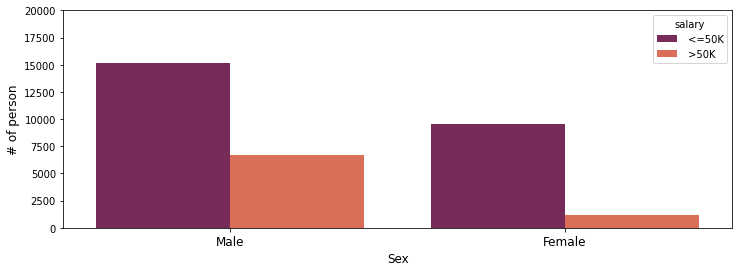

In [ ]:
plt.figure(figsize = (12,4))
ax = sns.countplot(data = df,x='sex',hue = 'salary',palette = 'rocket')

plt.xlabel('Sex',fontsize = 12)
plt.ylabel('# of person',fontsize = 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male','Female'],fontsize = 12)
plt.show()

There are more men than women in our dataset and, apparently, men have a higher income ratio compared to women.

#### 2. Based on Education

In [ ]:
education = df['education'].value_counts(normalize = True)
education = education*100
education

 HS-grad         32.250238
 Some-college    22.391818
 Bachelors       16.446055
 Masters          5.291607
 Assoc-voc        4.244341
 11th             3.608612
 Assoc-acdm       3.276926
 10th             2.865391
 7th-8th          1.983969
 Prof-school      1.768987
 9th              1.578576
 12th             1.329812
 Doctorate        1.268389
 5th-6th          1.022696
 1st-4th          0.515955
 Preschool        0.156629
Name: education, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


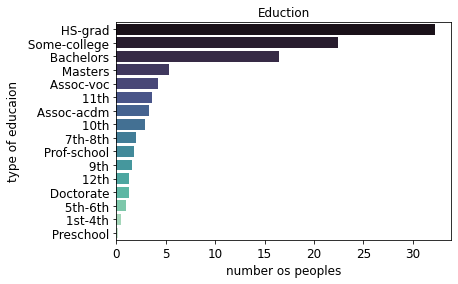

In [ ]:
sns.barplot(education.values,education.index,palette = 'mako')

plt.title("Eduction")
plt.xlabel("number os peoples",fontsize = 12)
plt.ylabel('type of educaion',fontsize = 12)
plt.tick_params(labelsize = 12)
plt.show()


**Here we see that the majority of people have completed HS-Grad, College or Bachelors**

#### 3. Based on Marital Status

In [ ]:
df['marital-status'].value_counts(normalize = True)*100

 Married-civ-spouse       45.993673
 Never-married            32.809189
 Divorced                 13.645158
 Separated                 3.147938
 Widowed                   3.049661
 Married-spouse-absent     1.283744
 Married-AF-spouse         0.070637
Name: marital-status, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


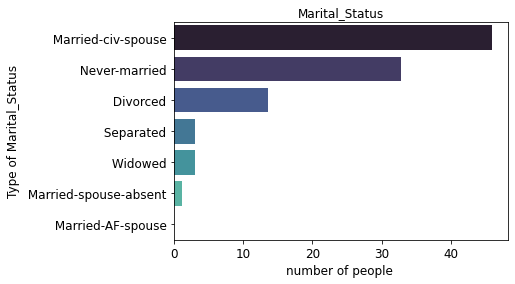

In [ ]:
Marital_Status = df['marital-status'].value_counts(normalize = True)*100

sns.barplot(Marital_Status.values,Marital_Status.index,palette = 'mako')

plt.xlabel("number of people ",fontsize = 12)
plt.ylabel("Type of Marital_Status",fontsize = 12)
plt.title("Marital_Status")
plt.tick_params(labelsize = 12)
plt.show()

### 4. Based on Ages

In [ ]:
df['age'].value_counts(normalize = True)*100

36    2.757901
31    2.727189
34    2.721047
23    2.693406
35    2.690335
        ...   
83    0.018427
88    0.009213
85    0.009213
86    0.003071
87    0.003071
Name: age, Length: 73, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


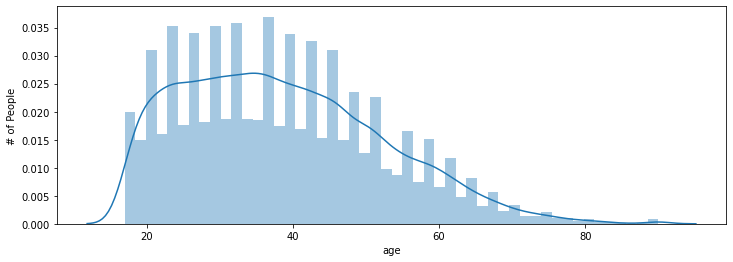

In [ ]:
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('# of People')
plt.show()

#### 5. Based on Race

In [ ]:
df['race'].value_counts(normalize = True)*100

 White                 85.427352
 Black                  9.594300
 Asian-Pac-Islander     3.190934
 Amer-Indian-Eskimo     0.955130
 Other                  0.832284
Name: race, dtype: float64

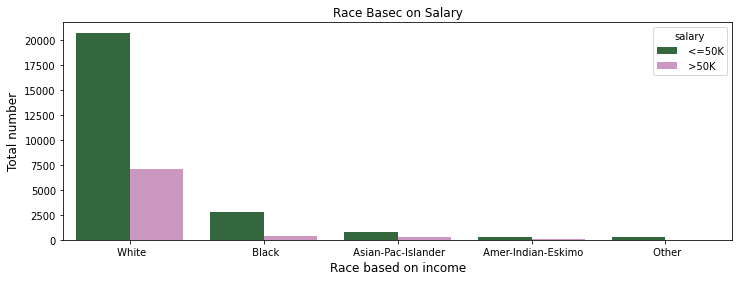

In [ ]:
plt.figure(figsize = (12,4))

sns.countplot(data = df,x = 'race',hue = 'salary',palette = 'cubehelix')
plt.title("Race Basec on Salary")
plt.xlabel('Race based on income',fontsize = 12)
plt.ylabel("Total number",fontsize = 12)
plt.show()

#### 85.4% people are white

### 6. Salary With Respect to Education

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


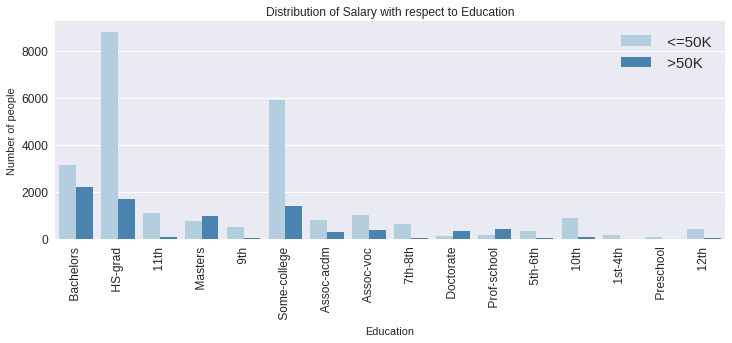

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (12,4))

sns.countplot(df['education'],hue = df['salary'],palette = 'Blues')
plt.title('Distribution of Salary with respect to Education')
plt.xlabel('Education')
plt.xticks(rotation='vertical')
plt.ylabel('Number of people')
plt.tick_params(labelsize = 12)
plt.legend(loc = 1,prop = {'size' : 15})
plt.show()

### 8. Salary with respect to Marital Status

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


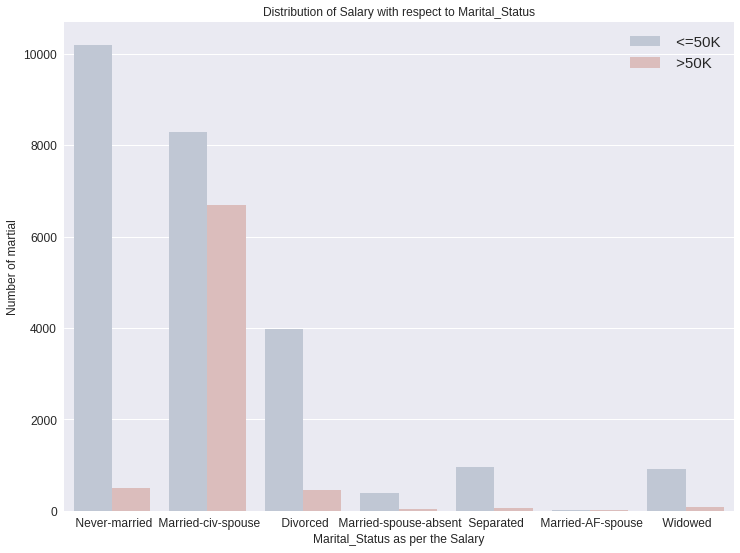

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize = (12,9))
sns.countplot(df['marital-status'],hue = df['salary'],palette = 'vlag')

plt.title('Distribution of Salary with respect to Marital_Status')
plt.xlabel('Marital_Status as per the Salary',fontsize = 12)
plt.ylabel('Number of martial',fontsize = 12)
plt.tick_params(labelsize = 12)
plt.legend(loc= 1,prop = {'size' : 15})
plt.show()


#### 9. Average Hours per Week

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


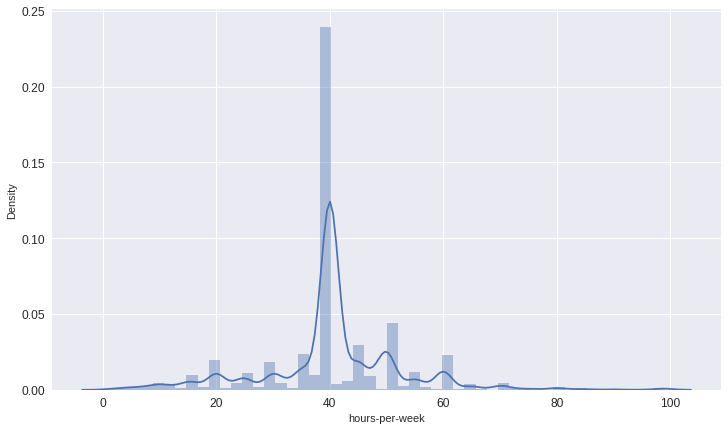

In [ ]:
plt.figure(figsize = (12,7))

sns.distplot(df['hours-per-week'])
plt.tick_params(labelsize = 12)
plt.show()

In [ ]:
df["hours-per-week"].mean()

40.437455852092995

Seems that the average Hours per week put by an individual is 40

#### 10. Occupation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


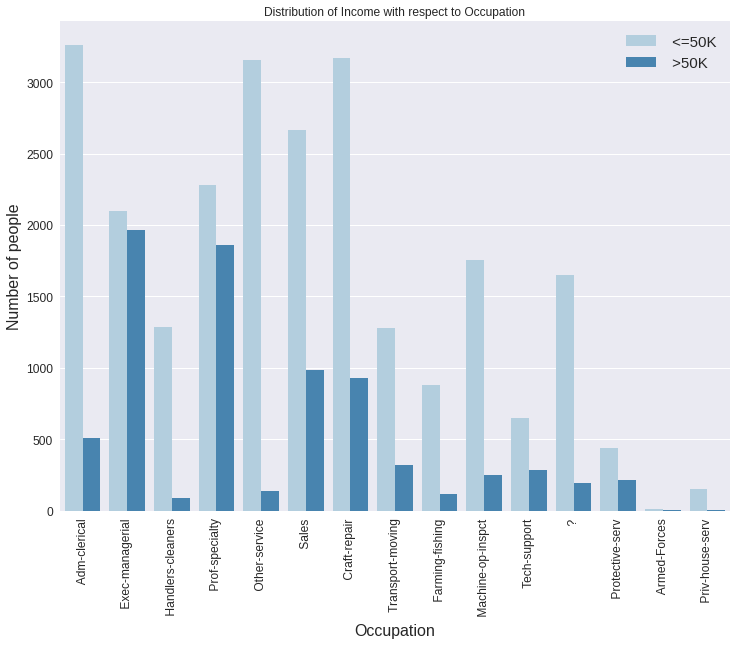

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(12,9))
sns.countplot(df['occupation'],
              hue=df['salary'], palette='Blues')
plt.title('Distribution of Income with respect to Occupation')
plt.xlabel('Occupation',fontsize = 16)
plt.xticks(rotation = 'vertical',fontsize = 35)
plt.ylabel('Number of people',fontsize = 16)
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

#### **** ************ **** *    * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

In [ ]:
df = df.replace(' ?', np.nan)

In [ ]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [ ]:
column_object = df.select_dtypes(include = 'object').columns

In [ ]:
for i in column_object:
  df[i] = df[i].str.strip()

In [ ]:
df["workclass"] = df["workclass"].replace(np.nan,df["workclass"].mode()[0])
df["occupation"] = df["occupation"].replace(np.nan,df["occupation"].mode()[0])
df["country"] = df["country"].replace(np.nan,df["country"].mode()[0])

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col])

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
education-num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
sex,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


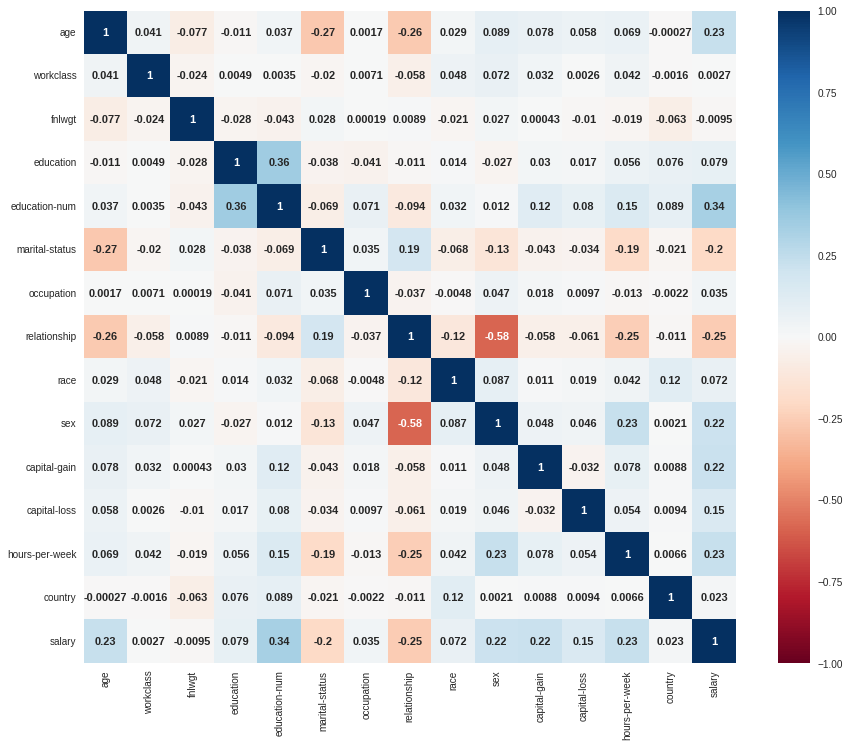

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
#sns.heatmap(df.corr(),ax = ax, cmap='RdBu', vmin=-1, vmax=1, annot=True)
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, 
            annot_kws={'fontsize':11, 'fontweight':'bold'},
           square=True)

plt.show()

#### Relationship and sex colmn has are more corelated so we will drop it

In [ ]:
df = df.drop(['relationship'],axis = 1)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

## feature scaling

In [ ]:
X = df.drop("salary",axis=1)
y = df.salary

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(X,index = df.index,columns = df.columns[:-1])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,country
0,0.030671,2.624298,-1.063611,-0.335437,1.134739,0.921634,-1.545256,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.26137
1,0.837109,1.721100,-1.008707,-0.335437,1.134739,-0.406212,-0.790092,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.26137
2,-0.042642,-0.085296,0.245079,0.181332,-0.420060,-1.734058,-0.286649,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.26137
3,1.057047,-0.085296,0.425801,-2.402511,-1.197459,-0.406212,-0.286649,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.26137
4,-0.775768,-0.085296,1.408176,-0.335437,1.134739,-0.406212,0.720237,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.35294
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,-0.085296,0.639741,-0.852205,0.746039,-0.406212,1.475401,0.393668,-1.422331,-0.145920,-0.21666,-0.197409,0.26137
32557,0.103983,-0.085296,-0.335433,0.181332,-0.420060,-0.406212,-0.034928,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.26137
32558,1.423610,-0.085296,-0.358777,0.181332,-0.420060,2.249480,-1.545256,0.393668,-1.422331,-0.145920,-0.21666,-0.035429,0.26137
32559,-1.215643,-0.085296,0.110960,0.181332,-0.420060,0.921634,-1.545256,0.393668,0.703071,-0.145920,-0.21666,-1.655225,0.26137


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

### Dataset is imbalance 

In [ ]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [ ]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [ ]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: salary, dtype: float64

## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=30)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39552, 13)
X_test shape: (9888, 13)
y_train shape: (39552,)
y_test shape: (9888,)


In [ ]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()


In [ ]:
#LogisticRegression
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

#GaussianNB/ Naive Byers
gn.fit(X_train,y_train)
y_pred_gn = gn.predict(X_test)

#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

#SVC
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

In [ ]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 77.033
F1 Score:  76.937
MSE:  22.967


In [ ]:
print("GaussianNB/ Naive Byers:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_gn) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_gn) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_gn) * 100,3))

GaussianNB/ Naive Byers:
Accuracy score: 68.042
F1 Score:  56.795
MSE:  31.958


In [ ]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 93.345
F1 Score:  93.61
MSE:  6.655


In [ ]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 92.152
F1 Score:  92.528
MSE:  7.848


In [ ]:
print("Support Vector Machine:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_svc) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_svc) * 100,3))

Support Vector Machine:
Accuracy score: 83.04
F1 Score:  83.892
MSE:  16.96


In [ ]:
print("XGBoost Classifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_xgb) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_xgb) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_xgb) * 100,3))

XGBoost Classifier:
Accuracy score: 84.082
F1 Score:  84.59
MSE:  15.918


## Hyper - Tuning Parameters

#### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100,150],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [ ]:
grid_search.best_score_

0.8473905255384612

In [ ]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=5)
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [ ]:
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("DecisionTreeClassifie:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt_tuned) * 100,3))


DecisionTreeClassifie:
Accuracy score: 86.114
F1 Score:  86.564
MSE:  13.886


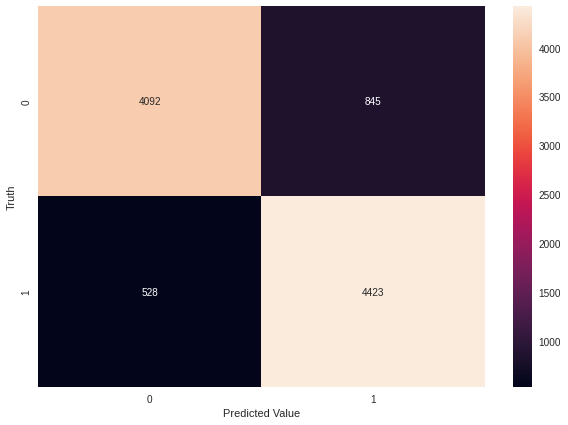

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

### Random Forest


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

parameters = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

rf_tuned = RandomForestClassifier(random_state=30)
                       
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=parameters, cv=5, random_state=30)


In [ ]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=30)

In [ ]:
rf_cv.best_params_

{'n_estimators': 102, 'max_depth': 40}

In [ ]:
rf_cv.best_score_

0.9183098954375648

In [ ]:
rf_tuned = RandomForestClassifier(max_depth=40, n_estimators=102, random_state=30)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=40, n_estimators=102, random_state=30)

In [ ]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf_tuned) * 100,3))

RandomForestClassifier:
Accuracy score: 93.426
F1 Score:  93.698
MSE:  6.574


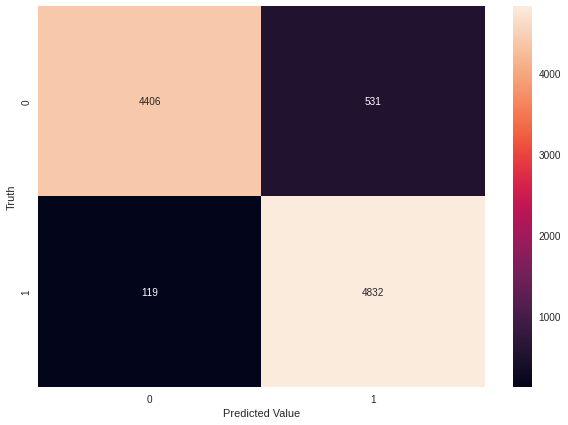

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

## Here we used multiple models like logistic regression, Naive Byers, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier and XGBoost classifier.
## The highest accuracy score of 93.426 and f1 score of 93.698 if from a Tuned Random Forest